<img src="https://nyp-aicourse.s3.ap-southeast-1.amazonaws.com/agods/nyp_ago_logo.png" width='400'/>

# Practical: Clustering and Dimensionality Reduction



## Objectives

- Learn to generate data points suitable for clustering practises using Scikit-Learn.
- Learn to perform clustering of a set of data points using Scikit-Learn k-Means algorithm.
- Examine how to identify a suitable number of clusters.
- Learn how to evalutate the quality of the clustering solution.
- Demonstrate the application of clustering in outlier detection.
- Apply PCA for dimensionality reduction and compare original to PCA transformed data
- Apply clustering techniques to a credit card holders dataset


## Clustering

Clustering algorithms partition data objects into several groups, subsets or categories. They help to discover groups of data samples with similar values or patterns. These techniques are used in many domains like:
- Engineering - Information Compression, noise removal
- Computer Science - Web mining, Information Retrieval
- Life and Medical Science – Taxonomy definition, gene and protein function identification
- Astronomy and Earth Science – Classification of stars and planets
- Social Science – Behaviour pattern analysis, relation identification among cultures
- Economics – Customer characteristics pattern recognition, stock trend analysis, fraud detection

Clustering is sometimes performed before predictive modelling. After clustering, we can study and model each individual cluster separately or use the cluster grouping as an additional input for subsequent modelling processes.

There are many different clustering algorithms, but only a few are widely used. This is because many hierarchical clustering methods require that distances between every pair of data points to be stored and updated in memory, which places a substantial demand on computer memory and processing resources if the data set is large. Typically, we use the k-Means clustering algorithm which is less demanding on the memory requirements.

In the first part of the practical, we will look at how we can apply the k-Means clustering algorithm using Scikit-Learn.

## Generate Data

Let us begin by generating some data for our practises.

### Step 1
Run the following codes to generate 500 data points centered around 3 centroids, that is, the 500 data points forms 3 clusters.



In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

#data = Generated data examples that forms 3 clusters
#classes = The cluster that each example belongs to
data, classes = make_blobs(500, centers=3, random_state=42)


Note that the ```data``` variable contains the generated 2-D samples while the ```classes``` variable contains the cluster number each sample belongs to.



### Step 2

Print out the first 10 items of the data and classes variables to see the generated data. 

<details>
<summary>
    Click here to see code
</summary>
    
    
```
print(data[:10])
print(classes[:10])
```

In [ ]:
#Enter code here


You should see the content of data and classes variables as follows:

The ```data``` variable consists of an array of 2-dimensional points:

```
[[-5.73035386 -7.58328602]
 [ 1.94299219  1.91887482]
 [ 6.82968177  1.1648714 ]
 [-2.90130578  7.55077118]
 [ 5.84109276  1.56509431]
 [ 5.47021465  1.11708586]
 [-4.31954265 -6.97616949]
 [ 4.91033566  1.92293157]
 [ 3.57225841  1.8307902 ]
 [-7.50444577 -6.85401854]]

```
     
     
The ```classes``` variable contains the cluster number that each data point belongs to:

```
[2 1 1 0 1 1 2 1 1 2]
```

Note that we have the actual cluster that the data belongs to because we generated the data. In real-life situations, we will not have this information. 

Later, we will be using the k-Means clustering algorithm to cluster the data point, the ```classes``` variable will be  useful for us to compare and measure the clustering performance of the algoritm.


### Step 3 Visualize the Data

We should visualize the data so that we have a feel of how the data is like before we perform the clustering process.

Run the following codes to generate a scatter plot of the data:



In [ ]:
import matplotlib.pyplot as plt
#Create a figure
#plt.figure()
#Red, green and blue will be used to colour the clusters
rgb = np.array(['r', 'g', 'b'])
#Create scatter plot based on the first (0) and second column (1)
plt.scatter(data[:, 0], data[:, 1], color=rgb[classes])
plt.title("Clusters")
plt.show()

The code uses three different colours to show the individual clusters. If you run the codes, you should be able to see the following figures:

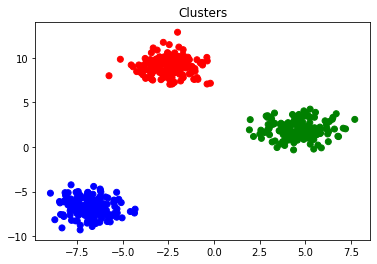

Note that we set the random_state argument of the make_blob() function as 42 for reproducible result.  You can try to use different number to generate different clusters if you prefer. Whatever integer values you choose, you should be able to see three separate clusters.

## k-Means Clustering 

k-means clustering is a relatively quick method for exploring clusters in data. The user sets the number of clusters (hyper-parameter k) to be created, and the procedure selects k well-spaced data records as starting centroid. Each data record is then assigned to the nearest centroid of the k clusters. The cluster centroids (average value of the attributes used in the clustering) are updated to accommodate the new members. Additional data passes are made as needed. As the cluster centers shift, a data point may need to be moved to its new nearest centroid. 

For the hyper-parameter k, we usually do not know what is a good value for k. We typically need to run the clustering process several times to find a suitable value for k. We will explore this in the later section.

Let us now use Scikit-Learn's k-Means algorithm to perform clustering and visually inspect how well the clustering was done.

### Step 4 Performing k-Means Clustering

Run the following codes to perform clustering:


In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

#data = Generated data examples that forms 3 clusters
#classes = The cluster that each example belongs to
#We use 1000 points
data, classes = make_blobs(1000, centers=3, random_state=42)

#Import the k-Means algorithm
from sklearn.cluster import KMeans

#Perform the clustering
kmeans = KMeans(n_clusters=3).fit(data)

### Step 5 Plotting Clustering Results

It will be useful if we can visualize our clustering results, use the following codes to plot the clusters:



In [ ]:
#Create a new plot
plt.figure()

#Subplot on the left
#121 = 1 row, 2 columns, subplot plot 1
plt.subplot(121) #Use subplot() to plot the generated data and results from k-Means clustering
#Use different colours for different cluster based on the generated data.
rgb = np.array(['r', 'g', 'b'])
plt.scatter(data[:, 0], data[:, 1], color=rgb[classes]) 
plt.title("Generated Data")


#Subplot on the right
#122 = 1 row, 2 columns, subplot plot 2
plt.subplot(122)
#Plot the same data except use results from our k-mean clustering(kmeans.labels_)
#Different colours for different cluster based kmeans.labels_
plt.scatter(
    data[:, 0],  #x
    data[:, 1],  #y
    color=rgb[kmeans.labels_])

#Plot the centroid of the clusters
plt.scatter(
    kmeans.cluster_centers_[:, 0], #x
    kmeans.cluster_centers_[:, 1], #y
    marker="*", # use a star
    s=200, # size is 200 (bigger)
    color="Yellow",
    label="Centroid")
plt.title("Clustered by k-Means")
plt.legend()
plt.show()


Run the codes to view the clustering results.


As can be seen from the above plots, the k-Means algorithm has formed three clusters since we indicated ```center=3```. 

From visual inspection, we can see that the algorithm has done a good job of clustering the data points, the generated cluster membership closely resembles that in the ```classes``` variable. Choose the correct k value (k=3) certainly plays a part as it coincides with our generated data. However, in most real cases, we might not know the number of clusters and must make a guess, what happens if we try other values of k?


## Exercise

Modify the codes and try different values of k (e.g 2, 4, 5). Remember to add more colours to the rbg array if necessary.
```python
rgb = np.array(['r', 'g', 'b', 'y']) #if k=4, needs to have at least 4 colours
```
For reference, acceptable single character colours are:
```python
{'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
```

Shown below is the result for value of k=4:

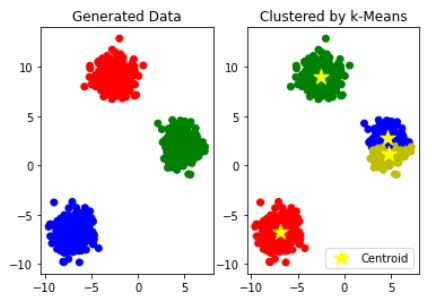


<details>
    <summary>Click here to see code</summary>

```python
import numpy as np
from sklearn.datasets import make_blobs

#data = Generated data examples that forms 3 clusters
#classes = The cluster that each example belongs to
#We use 1000 points
data, classes = make_blobs(1000, centers=4, random_state=42)

#Import the k-Means algorithm
from sklearn.cluster import KMeans

#Perform the clustering
kmeans = KMeans(n_clusters=4).fit(data)

#Enter your codes here

plt.figure()

#Subplot on the left
#121 = 1 row, 2 columns, subplot plot 1
plt.subplot(121) #Use subplot() to plot the generated data and results from k-Means clustering
#Use different colours for different cluster based on the generated data.
rgb = np.array(['r', 'g', 'b', 'y'])
plt.scatter(data[:, 0], data[:, 1], color=rgb[classes]) 
plt.title("Generated Data")


#Subplot on the right
#122 = 1 row, 2 columns, subplot plot 2
plt.subplot(122)
#Plot the same data except use results from our k-mean clustering(kmeans.labels_)
#Different colours for different cluster based kmeans.labels_
plt.scatter(
    data[:, 0],  #x
    data[:, 1],  #y
    color=rgb[kmeans.labels_])

#Plot the centroid of the clusters
plt.scatter(
    kmeans.cluster_centers_[:, 0], #x
    kmeans.cluster_centers_[:, 1], #y
    marker="*", # use a star
    s=200, # size is 200 (bigger)
    color="Yellow",
    label="Centroid")
plt.title("Clustered by k-Means")
plt.legend()
```

In [ ]:
#Enter your exercise codes here


## Evaluating Cluster Quality

There are various methods to evaluate the quality of a clustering solution. Quality of clustering are generally defined by the inter- and intra-class similarity. A high-quality clustering should have high intra-class similarity and low inter-class similarity. One of the measuring score provided by Scikit-Learn is the _silhouette coefficient_.

### Silhouette Coefficient
Silhouette coefficient offers a way for us to measure the consistency for clusters of data. The silhouette coefficient for a single data sample is defined as:

Silhouette Coefficient =$\frac{b-a}{max(a, b)}$


Where  
```a``` = mean intra-cluster distance (average of distances between members of the cluster)  
```b``` = mean nearest-cluster distance (the average distance between the sample and the nearest cluster that it is not a member of)

Value of the silhouette is between -1 (worst) and 1 (best).

To measure the performance of clustering algorithm, we can take the average value of the slihoutte coefficients.

Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


### Step 6

The following codes generate new clusters and calculate the average value of the silhouette coefficients.

Run the codes to view the result.

In [ ]:
#Calculate the silhouette score of the clusters
import numpy as np
from sklearn.datasets import make_blobs

#data = Generated data examples that forms 3 clusters
#classes = The cluster that each example belongs to
data, classes = make_blobs(500, centers=3, random_state=42)

#Perform k-Means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(data)

from sklearn import metrics

silhouette_score = metrics.silhouette_score(data, kmeans.labels_)
print("Silhouette Score = {0:.2f}".format(silhouette_score))


If you run the codes, you should see that we get a silhouette score of 0.84.

```
Silhouette Score = 0.84
```

Note that the silhouette score is simply the mean value of all the silhouette cofficients of the sample.

### Exercise

Repeat the above steps:

1. Generate a cluster with random_state=2. 
2. Plot a chart and from visual inspection you should note that the cluster has some overlaps. We expect k-Means to do worse compared with previous case.
3. Generate the silhouette score and check if score is worse compared to the case with random_state=42


<details>
<summary>
    <strong>Click here to see codes</strong>
</summary>
    
    
```
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

data, classes = make_blobs(500, centers=3, random_state=2)

kmeans = KMeans(n_clusters=3).fit(data)

silhouette_score = metrics.silhouette_score(data, kmeans.labels_)
print("Silhouette Score = {0:.2f}".format(silhouette_score))
```

In [ ]:
#Enter your exercise codes here


## Determining Value of k

Since we now have a way to evaluate the quality of a clutering solution, we can look for a suitable value of k by evaluating the silhouette score and selecting the k value with the best score. Note however, that this does not necessarily yields the best possible solution.

### Step 7 Finding Value of k

The following code can be used to find a good value of k based on the silhouette score:


In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics

#data = Generated data examples that forms 5 clusters
#classes = The cluster that each example belongs to
data, classes = make_blobs(2000, centers=5, random_state=10)

# Since we generate cluster of 5 centers, we expect
# clustering solutions near k=5 will have the best
# silhouette score 

#For storing silhouette scores
silhouette_scores = []

#Calculate silhouette scores for k from 2 to 10
for k in range(2, 10):
    #k-Means clustering for different values of k
    kmeans = KMeans(n_clusters=k).fit(data)
    #Calculate the silhoutte score for the current value of k and add to the list
    silhouette_scores.append(metrics.silhouette_score(data, kmeans.labels_))

#Print out all the silhouette score for k = 2 to 10
print(silhouette_scores)
#Print out k with the largest value of silhouette in the silhouette_score list
max_score, max_index = max((max_score, max_index) for (max_index, max_score) in enumerate(silhouette_scores))

# +2 is needed because we start first element in 
# silhouette_list corresponds to k=2
print("Best value of k is {0} with silhouette score of {1}".format(max_index+2, max_score))

The codes generate clusters with 5 centers and perform clustering for values of k from 2 to 10. Natually, we expect the silhouette score to be best for k=5 since we generated the clusters with the ```centers=5``` argument. Run the codes and you should get a similar result as follows:

```
[0.5831839693490849, 0.606440936062678, 0.6837161306731291, 0.7628612086779674, 0.6760806053765829, 0.5786531102367165, 0.4953266496551252, 0.40534426723512434]
Best value of k is 5 with silhouette score of 0.7628612086779674

```

Note that it gives a good answer but not necessarily the best answer. Try random_state=42 and you should see that k is 4 instead of 5. 


We can plot the scores on a graph for better visualization:


### Step 8 Visualization k vs Silhouette Scores

Use the following code to plot a graph of various values of k versus the silhouette scores: 


In [ ]:
plt.figure()
plt.plot(range(2, 10), silhouette_scores)
plt.show()

As can be seen from the figure below, we have a best value of k at 5, which is what we have generated. Again, note that we might not necessarily get k=5 as the best answer. 

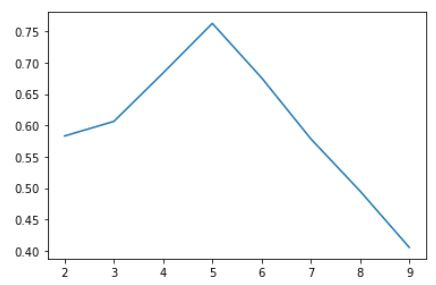


## Applications of Clustering
There are many applications of the clustering algorithm, we will first look at how clustering can be used to detect outliers. 


### Outliers Detection with Clustering

Let us next see how to use clustering to detect outlier using Scikit-Learn.
We will detect the outlier by measuring the distances of each point from the center of the cluster. The points that are furthest away from the center will be flagged as outliers.


Write codes to generate 500 data points with 1 center and use k-Means to perform clustering and display them in a scatter plot.

<details>

<summary><strong>Click to view codes</strong></summary>

```
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#Generate clusters
data, classes = make_blobs(500, centers=1, random_state=10)
plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.show()
```



In [ ]:
#Enter your codes here


You should see a cluster similar to the following:

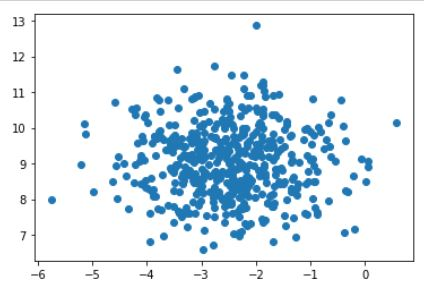

To detect outliers, we will first find the centre of the cluster and then flag the furthest 3 points as outliers.


We will apply k-Means clustering to detect the center and then use the ```transform()``` method to calculate the distance of every point to the center of the cluster. 

First perform k-means clustering on the data with n_clusters=1.

<details>
    <summary>Click here to see code</summary>
    
```python
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1).fit(data)

```

In [ ]:
#Enter your codes here


We can then calculate the distance of every point to the center of the cluster

In [ ]:
distance_to_center = kmeans.transform(data)
print(distance_to_center)


Run the following codes to get 3 points with the largest distances from the centroid using ```argpartition``` and prints them out:


In [ ]:
#Get the 3 largest elements
#The argparition function with argument -2 divides the array 
#into 2 partitions with 3 largest elements at the end. Note this is not a sort function
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.argpartition.html
outliers_index = np.argpartition(distance_to_center, -3, axis=0)[-3:]
print("Outliers: ")
for idx in outliers_index:
    print("Index: {0}, Distance: {1}".format(idx[0], distance_to_center[idx][0][0]))

In [ ]:
#Alternatively, we can also reshape the array as below

distance_to_center2=distance_to_center.reshape(-1)
outliers_index2=distance_to_center2.argsort()[-3:]
print("Outliers: ")
for idx in outliers_index2:
    print("Index: {0}, Distance: {1}".format(idx, distance_to_center2[idx]))

You should get the output as shown below:

```
Outliers: 
Index: 0, Distance: 3.258497249471047
Index: 432, Distance: 3.4158213150967067
Index: 96, Distance: 3.8494286443498136
```

## Visualizing Outliers

Run the following codes to plot the data points, centroid of the cluster as well as highlight the outliers:



In [ ]:
#The outliers variable contains the x an y coordinates of the 3 outliers
#outliers = data[outliers_index][:,0]
outliers = data[outliers_index2]

#Plot the figure using scatter plot
plt.figure()
plt.scatter(data[:, 0], data[:, 1], label="Data Points", s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[0, 1], label="Centroids", marker="*")
plt.scatter(outliers[:,0], outliers[:,1], label="Outliers", edgecolors="g", facecolors="none", s=50)
plt.legend()
plt.show()

You should see a scatter plot similar to the one shown below:

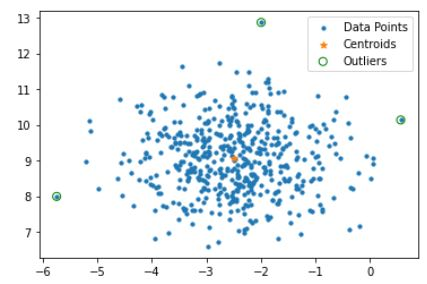

Notice that the outliers are highlighted as the furthest points from the centroid of the cluster.


## Dimensionality Reduction - PCA

In this section, we will learn the basics of Scikit-Learn's PCA function. We will first try a simple PCA example to learn how to apply PCA to some data.

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

#create 2D data
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

# Compute PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.n_components_) #number of components
print(pca.components_) #principal axes in feature space

#Transform data with PCA matrix
X_t = pca.transform(X)

# plot original data
plt.scatter(X[:, 0], X[:, 1])
plt.title('Original Data')
plt.axis('square')
plt.show()

# plot transformed data
plt.scatter(X_t[:, 0], X_t[:, 1])
plt.title('Transformed Data')
plt.axis('square')
plt.show()

# review PCA variances
print(pca.explained_variance_) #amount of variance explained by each axes
print(pca.explained_variance_ratio_) #percentage of variance explained by each axes



## PCA with Iris Dataset
We will apply PCA to the Iris dataset by reducing its dimensions from 4 to 2. First, we will load and examine the dataset

In [ ]:
iris = sns.load_dataset('iris')
print(iris.shape)
print(iris.head())

Take a look at how the data instances are distributed in the feature space. Notice how Setosa is the most separable.

In [ ]:
sns.pairplot(iris, hue='species')

# Apply PCA to reduce dimension from 4 to 2

Try to write some code to apply PCA to reduce the dimension from 4 to 2, and print the number of components as well as the percentage of variance explained by each axes

<details>
    <summary>Click here to see code</summary>

```python
# Separate the dataset into features and the label
X = iris.drop('species', axis=1)
y = iris['species']

#define PCA with targeted reduced features
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X) #fit and transform togteher
print(pca.n_components_)
print(pca.explained_variance_ratio_)

```

In [ ]:
#Enter code here

We can also plot a bar graph of the principal components and the percentage of explained variance as below

In [ ]:
Cols = ['PC1','PC2']
rData = pca.explained_variance_ratio_

plt.bar(Cols, rData)
plt.title('Principal Component Importance')
plt.ylabel('Percentage')
plt.show()

# Review the dataset in the new 2-dimensional subspace

Finally, let's examine how the dataset looks in tthe reduced dimensional space...

In [ ]:
print(X.shape)
print(X_reduced.shape)
X_reduced_df = pd.DataFrame(X_reduced, columns=["1st principal component", "2nd principal component"])
iris_reduced = pd.concat([X_reduced_df, y], axis=1)  #add target col
iris_reduced.head(100)

...and create a scatter plot of this reduced dataset

In [ ]:
sns.scatterplot(x=iris_reduced['1st principal component'], y=iris_reduced['2nd principal component'], hue=iris_reduced['species'])

### Exercise

Compare the performance of K-means clustering using any two of the original dimensions with the two PCA dimensions

<details>

<summary><strong>Click to view codes</strong></summary>

```python
kmeans = KMeans(n_clusters=3).fit(X_reduced_df)

silhouette_score = metrics.silhouette_score(X_reduced_df, kmeans.labels_)
print("Silhouette Score = {0:.2f}".format(silhouette_score))

iris2=iris.iloc[:,0:2]
print(iris2.head)
kmeans = KMeans(n_clusters=3).fit(iris2)

silhouette_score = metrics.silhouette_score(iris2, kmeans.labels_)
print("Silhouette Score = {0:.2f}".format(silhouette_score))
```

In [ ]:
# insert code here


## Applying clustering to credit card data

Let us now try to apply clustering techniques on some credit card data. The dataset summarizes the usage behavior of about 9000 active credit card holders with 18 behavourial variables as below:

CUST_ID : Identification of Credit Card holder

BALANCE : Balance amount left in their account to make purchases

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

Let's load the libraries and the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df_cc = pd.read_csv('datasets/CC_GENERAL.csv')
df_cc.head()

We can look at the columns, the shape of the dataset as well as some statistical measures

In [ ]:
df_cc.columns

In [ ]:
df_cc.shape

In [ ]:
df_cc.describe()

Note that there are many outliers, but we won't drop them for now as they may contain useful information

In [ ]:
df_cc.isnull().sum()

As seen above, there are also some null values. We will replace missing values with the means

In [ ]:
df_cc['CREDIT_LIMIT'].fillna(df_cc['CREDIT_LIMIT'].mean(), inplace=True)
df_cc['MINIMUM_PAYMENTS'].fillna(df_cc['MINIMUM_PAYMENTS'].mean(), inplace=True)
df_cc.isnull().sum()

Next, we will drop the customer id column and check that it has been successfully dropped.

In [ ]:
df_cc.drop('CUST_ID', axis=1, inplace=True)
df_cc.head(1)

Run the following code to perform standardization and normalization. In this case we perform these transformations so that all features have similar magnitudes

In [ ]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df_cc) #standardize data mean 0 stdev 1

# Normalizing the Data 
normalized_df = normalize(scaled_df) #scales data so it sums to unit norm
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 


Write some code to perform dimension reduction using PCA to two components, cast the transfromed data as a data frame, rename the columns as P1 and P2, and display the first two rows of the transformed data

<details>
    <summary>Click here to see code</summary>
    
```python
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head(2)
```

In [ ]:
# insert code here

Let us now use an elbow plot to determine the value of k for k-means clustering

In [ ]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Since it is hard to determine the elbow point, we will use the silhoutte scores. The highest score is for k=3

In [ ]:
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

Write some code to perform k-means clustering on normalized_df.
<details>
    <summary>Click here to see code</summary>

```python
kmean= KMeans(3)
kmean.fit(normalized_df)

```

In [ ]:
#insert code here

We can also examine the clusters to try to understand what they represent

In [ ]:
labels=kmean.labels_
clusters=pd.concat([df_cc, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

In [ ]:
clusters['cluster'].value_counts()

In [ ]:
clusters.groupby('cluster').mean()

Discuss some characteristics of each cluster.

Let us use PCA to visualize the clusters

In [ ]:
finalDf = pd.concat([X_principal, pd.DataFrame({'cluster':labels})], axis = 1)
finalDf.head()

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="P1", y="P2", hue="cluster", data=finalDf,palette=['red','blue','green'])
plt.show()

# Summary

The practical demonstrates how to use Scikit-Learn to perform clustering. We use Scikit-Learn to help us generate data points that forms clusters according to a predefined hyper-parameter k using k-means clustering.

We examined how to perform clustering and visualize the results using scatter plots. We also saw how to determine the quality of clustering using the silhouette scores. We determined the best value of k by performing a series of clustering operations with different values of k and picking the model with the best silhoutte score.

Lastly, we looked at the application of clustering in outlier detection, applied PCA for dimensionality reduction, and applied clustering techniques to credit card holders dataset.